In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")

In [3]:
df1.head()
df1.tail()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6429 non-null   float64
 4   long       6434 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6464 non-null   object 
 9   capacity   6465 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 708.9+ KB


In [4]:
res = df1['capacity'].str.extract(r'(?i)(?P<Amount>\d+(?:\.\d+)?)\s?(?P<Unit>[CM]?L|LTR)\b')
res.Unit = res.Unit.str.lower()
df1['capacity'] = res['Amount']
print(df1.head()['capacity'])

0    500
1    NaN
2    330
3    500
4    330
Name: capacity, dtype: object


In [5]:
df1['lat'] = df1['lat'].astype(float, errors = 'raise')
df1['long'] = df1['long'].astype(float, errors = 'raise')
df1['pop'] = df1['pop'].astype(float, errors = 'raise')
df1['capacity'] = df1['capacity'].astype(float, errors = 'raise')
df1['date'] = pd.to_datetime(df1['date'])
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         6480 non-null   float64       
 1   date       6480 non-null   datetime64[ns]
 2   city       6480 non-null   object        
 3   lat        6429 non-null   float64       
 4   long       6434 non-null   float64       
 5   pop        6480 non-null   float64       
 6   shop       6480 non-null   object        
 7   brand      6480 non-null   object        
 8   container  6464 non-null   object        
 9   capacity   4308 non-null   float64       
 10  price      6480 non-null   float64       
 11  quantity   6480 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 708.9+ KB


,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500.0,0.96,13280.0
1,1.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,NaN,2.86,6727.0
2,2.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330.0,0.87,9848.0
3,3.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500.0,1.00,20050.0
4,4.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330.0,0.39,25696.0


In [6]:
df1  = df1.dropna(how = 'all')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         6480 non-null   float64       
 1   date       6480 non-null   datetime64[ns]
 2   city       6480 non-null   object        
 3   lat        6429 non-null   float64       
 4   long       6434 non-null   float64       
 5   pop        6480 non-null   float64       
 6   shop       6480 non-null   object        
 7   brand      6480 non-null   object        
 8   container  6464 non-null   object        
 9   capacity   4308 non-null   float64       
 10  price      6480 non-null   float64       
 11  quantity   6480 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 658.1+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         6480 non-null   float64       
 1   date       6480 non-null   datetime64[ns]
 2   city       6480 non-null   object        
 3   lat        6480 non-null   object        
 4   long       6480 non-null   object        
 5   pop        6480 non-null   float64       
 6   shop       6480 non-null   object        
 7   brand      6480 non-null   object        
 8   container  6480 non-null   object        
 9   capacity   6480 non-null   object        
 10  price      6480 non-null   float64       
 11  quantity   6480 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 658.1+ KB


<AxesSubplot:>

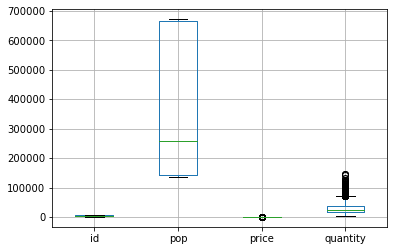

In [9]:
df1.isnull().sum()
df1['lat'].fillna(df1['lat'].mean,inplace=True)
df1['long'].fillna(df1['long'].mean,inplace=True)
df1['container'].fillna(df1['container'].mean,inplace=True)
df1['capacity'].fillna(df1['capacity'].mean,inplace=True)
df1.isnull().sum()
df1.info()
df1.boxplot()

<AxesSubplot:>

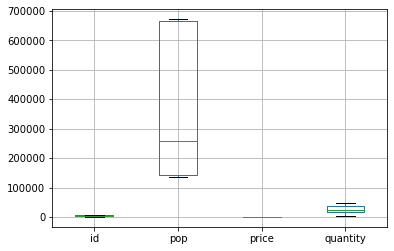

In [11]:
q1 = np.quantile(df1['quantity'], 0.25)
q2 = np.quantile(df1['quantity'], 0.50)
q3 = np.quantile(df1['quantity'], 0.75)
IQR = q3 - q1
upperwhishker = q3 + (IQR * 0.5)


df1['quantity'] = np.where(df1['quantity']>upperwhishker,upperwhishker,df1['quantity'])

q1 = np.quantile(df1['price'], 0.25)
q2 = np.quantile(df1['price'], 0.50)
q3 = np.quantile(df1['price'], 0.75)
IQR = q3 - q1
upperwhishker = q3 + (IQR * 0.5)



df1['price'] = np.where(df1['price']>upperwhishker,upperwhishker,df1['price'])
df1.boxplot()

In [13]:
df_city = pd.get_dummies(df1['city'])
df_shop = pd.get_dummies(df1['shop'])
df_brand = pd.get_dummies(df1['brand'])
df_brand.head()

,adult-cola,gazoza,kinder-cola,lemon-boost,orange-power
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [14]:
df_city.head()


,Athens,Irakleion,Larisa,Patra,Thessaloniki
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [15]:
import logging

class CustomTimeSeriesSplit:

    def __init__(self,
                 train_set_size: int,
                 test_set_size: int
                 ):
        """
        :param train_set_size: data points (days) in each fold for the train set
        :param test_set_size: data points (days) in each fold for the test set
        """
        self.train_set_size = train_set_size
        self.test_set_size = test_set_size
        self._logger = logging.getLogger(__name__)

    def split(self,
              x: np.array,
              y: np.array = None) -> (np.array, np.array):
        """Return train/test split indices.
        :param x: time series to use for prediction, shape (n_samples, n_features)
        :param y: time series to predict, shape (n_samples, n_features)
        :return: (train_indices, test_indices)
        Note: index of both x and y should be of type datetime.
        """
        if y is not None:
            assert x.index.equals(y.index)
        split_points = self.get_split_points(x)
        for split_point in split_points:
            is_train = (x.index < split_point) & (x.index >= split_point -
                                                  pd.Timedelta(self.train_set_size, unit='D'))
            is_test = (x.index >= split_point) & (x.index < split_point +
                                                  pd.Timedelta(self.test_set_size, unit='D'))
            if not is_train.any() or not is_test.any():
                self._logger.warning('Found %d train and %d test observations '
                                     'skipping fold for split point %s',
                                     is_train.sum(), is_test.sum(), split_point)
                continue
            dummy_ix = pd.Series(range(0, len(x)), index=x.index)
            ix_train = dummy_ix.loc[is_train].values
            ix_test = dummy_ix.loc[is_test].values
            if ix_train is None or ix_test is None:
                self._logger.warning('Found no data for train or test period, '
                                     'skipping fold for split date %s',
                                     split_point)
                continue
            yield ix_train, ix_test

    def get_split_points(self, x: np.array) -> pd.DatetimeIndex:
        """Get all possible split point dates"""
        start = x.index.min() + pd.Timedelta(self.train_set_size, unit='D')
        end = x.index.max() - pd.Timedelta(self.test_set_size - 1, unit='D')
        self._logger.info(f'Generating split points from {start} to {end}')
        split_range = pd.date_range(start, end, freq='D')
        first_split_point =  (len(split_range) + self.test_set_size - 1) % self.test_set_size
        return split_range[first_split_point::self.test_set_size]

In [16]:
%load_ext autoreload
%autoreload 2

import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


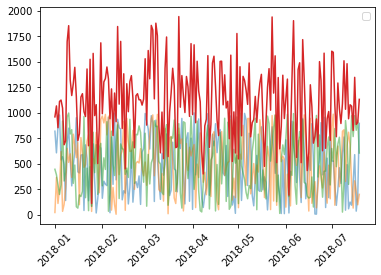

In [17]:
number_of_data_points = 200
columns = ['car usage', 'train usage', 'taxi usage']
date_index = pd.date_range(dt.datetime(2018,1,1), 
                           periods=number_of_data_points, 
                           freq='D')
x = pd.DataFrame(np.random.rand(number_of_data_points, len(columns))*999,
                 columns=columns,
                 index=date_index)
y = pd.Series(x.sum(axis=1) * .75 + np.random.randn(number_of_data_points)*100, name='travelers at the gate')

fig, ax = plt.subplots(1, 1)
for col in columns:
    ax.plot(x[col], alpha=.5)
ax.plot(y)
ax.legend()
plt.xticks(rotation=45);

In [18]:
outer_train_set_size = 28
outer_test_set_size = 7

inner_train_set_size = 14
inner_test_set_size = 7

outer_loop_splitter = CustomTimeSeriesSplit(
    train_set_size=outer_train_set_size,
    test_set_size=outer_test_set_size)

inner_loop_splitter = CustomTimeSeriesSplit(
    train_set_size=inner_train_set_size,
    test_set_size=inner_test_set_size)


In [19]:
# Initialize models
model_1 = SVR()
model_2 = ElasticNet()

# Initialize pipelines
pipeline_1 = Pipeline([('scaling', StandardScaler()),
                       ('model', model_1)])
pipeline_2 = Pipeline([('scaling', StandardScaler()),
                       ('model', model_2)])

# Initialize hyperparameter grids
param_grid_1 = [{'model__kernel': ['rbf'],
                 'model__C': np.power(10., np.arange(-4, 4)),
                 'model__gamma': np.power(10., np.arange(-5, 0))},
                {'model__kernel': ['linear'],
                 'model__C': np.power(10., np.arange(-4, 4))}]
param_grid_2 = [{'model__l1_ratio': [.1, .5, .7, .9, .95, .99, 1],
                 'model__alpha': [.1, .5, 1, 10, 100]}]

# Make a DataFrame to save all algorithms and include columns to save the results
algorithms = {
        'param_grid': [param_grid_1, param_grid_2],                                            
        'pipeline': [pipeline_1, pipeline_2],
    }
algorithm_names = ['SVR', 'ElasticNet']
algorithms_and_results = pd.DataFrame(algorithms, index=algorithm_names)
for column in ['scores_cv_inner', 'scores_cv_outer']:
    algorithms_and_results[column] = [[] for _ in range(len(algorithm_names))]
algorithms_and_results

,param_grid,pipeline,scores_cv_inner,scores_cv_outer
SVR,"[{'model__kernel': ['rbf'], 'model__C': [0.000...","(StandardScaler(), SVR())",[],[]
ElasticNet,"[{'model__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95...","(StandardScaler(), ElasticNet())",[],[]


In [20]:
for outer_train_idx, outer_test_idx in outer_loop_splitter.split(x, y):
    x_train = x.iloc[outer_train_idx]
    y_train = y.iloc[outer_train_idx]
    x_test = x.iloc[outer_test_idx]
    y_test = y.iloc[outer_test_idx]

    # The grid search estimators need to be rebuild each outer fold, because the inner loop
    # cross validation can only be defined given the train set from the outer loop.
    grid_search_cv_estimators = {}
    for (name, param_grid, pipeline) in algorithms_and_results[['param_grid', 'pipeline']].itertuples():
        
        # The inner loop for hyperparameter tuning
        grid_search_cv_estimator = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            scoring='r2',
            cv=inner_loop_splitter.split(x_train, y_train),
            n_jobs=4,
            refit=True)
        grid_search_cv_estimator.fit(x_train, y_train)

        outer_score = grid_search_cv_estimator.score(x_test, y_test)
        algorithms_and_results.loc[name, 'scores_cv_inner'].append(grid_search_cv_estimator.best_score_)
        algorithms_and_results.loc[name, 'scores_cv_outer'].append(outer_score)
algorithms_and_results

,param_grid,pipeline,scores_cv_inner,scores_cv_outer
SVR,"[{'model__kernel': ['rbf'], 'model__C': [0.000...","(StandardScaler(), SVR())","[0.9382834105316183, 0.8660551032836521, 0.822...","[0.8504519303104592, 0.8768561788278445, 0.942..."
ElasticNet,"[{'model__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95...","(StandardScaler(), ElasticNet())","[0.9530386353021569, 0.9071076601546593, 0.868...","[0.8750777780594223, 0.8997595324708504, 0.898..."


In [21]:
for agg_function in [np.mean, np.median, np.std]:
    for column in ['scores_cv_outer', 'scores_cv_inner']:
        aggregation_dict = {column + '_' + agg_function.__name__: lambda df: df[column].map(agg_function)}
        algorithms_and_results = algorithms_and_results.assign(**aggregation_dict)
algorithms_and_results.T


,SVR,ElasticNet
param_grid,"[{'model__kernel': ['rbf'], 'model__C': [0.000...","[{'model__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95..."
pipeline,"(StandardScaler(), SVR())","(StandardScaler(), ElasticNet())"
scores_cv_inner,"[0.9382834105316183, 0.8660551032836521, 0.822...","[0.9530386353021569, 0.9071076601546593, 0.868..."
scores_cv_outer,"[0.8504519303104592, 0.8768561788278445, 0.942...","[0.8750777780594223, 0.8997595324708504, 0.898..."
scores_cv_outer_mean,0.857789,0.861277
scores_cv_inner_mean,0.860805,0.877371
scores_cv_outer_median,0.877627,0.89356
scores_cv_inner_median,0.86919,0.887735
scores_cv_outer_std,0.140842,0.113127
scores_cv_inner_std,0.06503,0.06235


In [22]:
best_algorithm_name = algorithms_and_results['scores_cv_outer_mean'].idxmax()
best_pipeline = algorithms_and_results.loc[best_algorithm_name, 'pipeline']
best_param_grid = algorithms_and_results.loc[best_algorithm_name, 'param_grid']
print(f'Choose best estimater: {best_algorithm_name}')

Choose best estimater: ElasticNet


C:\Users\tarus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


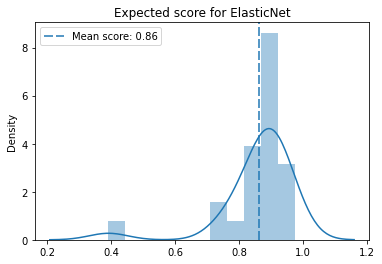

In [23]:
scores, mean_score = algorithms_and_results.loc[best_algorithm_name, ['scores_cv_outer', 'scores_cv_outer_mean']]
ax = sns.distplot(scores)
ax.set_title(f'Expected score for {best_algorithm_name}')
ax.axvline(mean_score, dashes=[6, 2], label=f'Mean score: {round(mean_score,2)}')
ax.legend();


In [24]:
x_most_recent = x.iloc[-outer_train_set_size:]
y_most_recent = y.iloc[-outer_train_set_size:]
    
grid_search_cv_estimator = GridSearchCV(
    estimator=best_pipeline,
    param_grid=best_param_grid,
    scoring='r2',
    cv=inner_loop_splitter.split(x_most_recent, y_most_recent),
    n_jobs=4,
    refit=True)
grid_search_cv_estimator.fit(x_most_recent, y_most_recent)
print(f'Final hyperparameters: {grid_search_cv_estimator.best_params_}')

Final hyperparameters: {'model__alpha': 10, 'model__l1_ratio': 0.99}


In [37]:
import pandas as pd
import types


class NestedCV:
    def __init__(self, k):
        self.k = k

    def split(self, data, date_column):
        # Sort data by date
        data = data.sort_values(by=date_column)

        # Calculate number of samples per fold (avoid edge case with equal split)
        fold_size = (len(data) // self.k) + 1

        for i in range(self.k):
            # Calculate indices for train and validation sets
            val_start_idx = i * fold_size
            val_end_idx = min((i + 1) * fold_size, len(data))
            val_indices = list(range(val_start_idx, val_end_idx))

            # Split data into train and validation sets
            validate = data.iloc[val_indices]
            train = data.drop(val_indices)

            yield train, validate


            if __name__ == "__main__":
                # Sample data loading
                data = pd.DataFrame({
                    "date": pd.date_range(start="2022-01-01", periods=100),
                    "value": range(100)
                })

                # Nested CV
                k = 3
                cv = NestedCV(k)
                splits = cv.split(data, "date")

                # Check return type
                assert isinstance(splits, types.GeneratorType)

                # Check return types, shapes, and data leaks (adjusted)
                count = 0
                for train, validate in splits:
                    # Types
                    assert isinstance(train, pd.DataFrame)
                    assert isinstance(validate, pd.DataFrame)

                    # Shape
                    assert train.shape[1] == validate.shape[1]

                    count += 1

                # Check number of splits returned
                assert count == k



In [45]:
k = 3
cv = NestedCV(k)
splits = cv.split(df1, "date")

    # Check return type
assert isinstance(splits, types.GeneratorType)

    # Define evaluation metrics
evaluation_metrics = []

    # Perform nested cross-validation
for train, validate in splits:
            # Extract features and target variables
    X_train=x_train
    y_train=y_train
    X_validate=x_test
    y_validate=y_test


        # Make predictions using pre-trained model
    predictions = model_2.predict(X_validate)

        # Evaluate the model (example using mean absolute error)
    mae = mean_absolute_error(y_validate, predictions)
    evaluation_metrics.append(mae)

    # Compute overall performance metric (e.g., average MAE)
average_mae = sum(evaluation_metrics) / len(evaluation_metrics)
print("Average MAE:", average_mae)

RecursionError: maximum recursion depth exceeded while calling a Python object